In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import datetime 
import calendar
from pathlib import Path

In [2]:

p = Path(os.getcwd()).parents[2] #donne path vers fichier contenant data ( 3 level up d ici)
df=pd.read_csv(str(p)+"\\data\\f_ETHUSD_1.csv",)

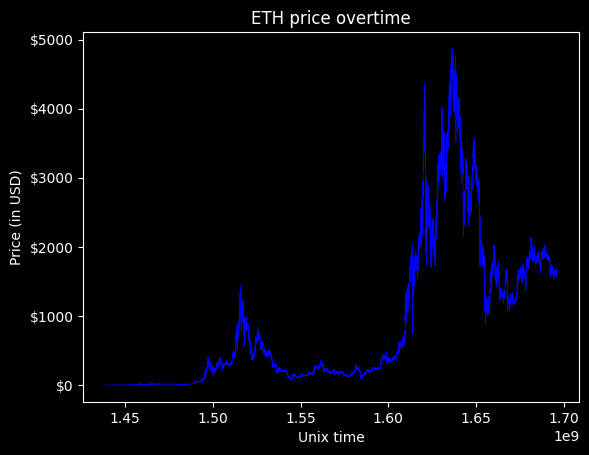

In [3]:
plt.style.use("dark_background")
plt.plot(df["Time"],df["Open"],linewidth=0.5,color="b")
plt.title("ETH price overtime")
plt.xlabel("Unix time")
plt.ylabel("Price (in USD)")
y_ticks=list(range(0,5001,1000))
plt.yticks(y_ticks,labels=[f"${tick}" for tick in y_ticks])
plt.show()

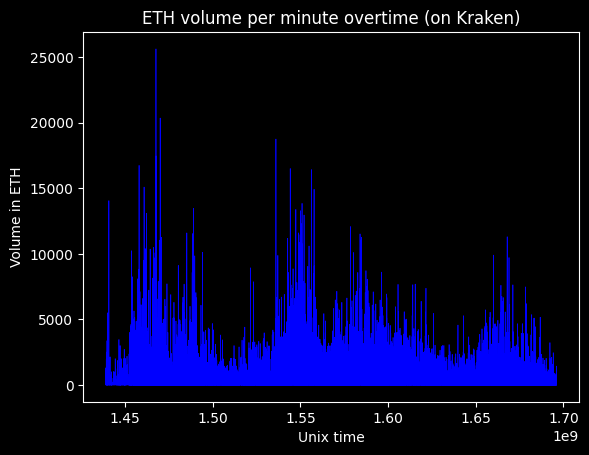

In [4]:
plt.style.use("dark_background")
plt.plot(df["Time"],df["Volume"],linewidth=0.5,color="b")
plt.title("ETH volume per minute overtime (on Kraken)")
plt.xlabel("Unix time")
plt.ylabel("Volume in ETH")
#y_ticks=list(range(0,19,2))
#plt.yticks(y_ticks,labels=[f"${tick}M" for tick in y_ticks])
plt.show()

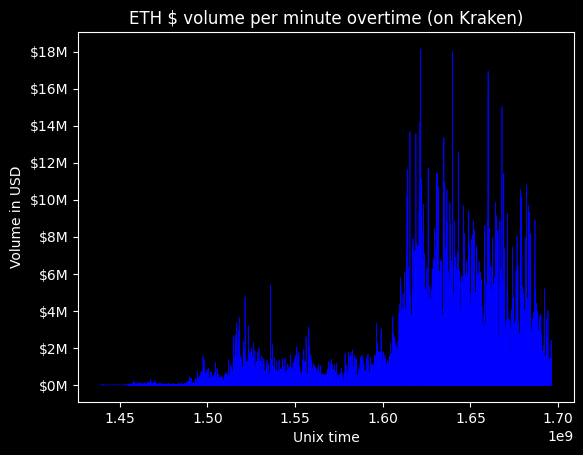

In [5]:
plt.style.use("dark_background")
plt.plot(df["Time"],df["Open"]*df["Volume"]/1000000,linewidth=0.5,color="b")
plt.title("ETH $ volume per minute overtime (on Kraken)")
plt.xlabel("Unix time")
plt.ylabel("Volume in USD")
y_ticks=list(range(0,19,2))
plt.yticks(y_ticks,labels=[f"${tick}M" for tick in y_ticks])
plt.show()

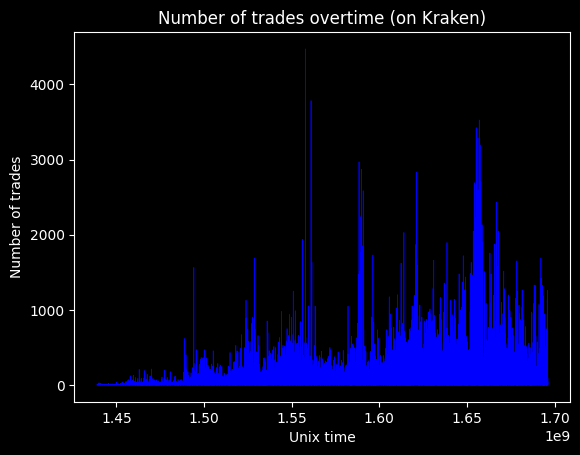

In [6]:
plt.style.use("dark_background")
plt.plot(df["Time"],df["Trades"],linewidth=0.5,color="b")
plt.title("Number of trades overtime (on Kraken)")
plt.xlabel("Unix time")
plt.ylabel("Number of trades")
plt.show()

In [7]:
hours=np.arange(0,24,1)
week=np.arange(0,7,1)
sum_count=np.zeros((len(week),len(hours),2))
for ind,time in enumerate(df["Time"]):
   hour=datetime.datetime.utcfromtimestamp(time).hour
   weekday=datetime.datetime.utcfromtimestamp(time).weekday()
   sum_count[weekday][hour][0]+=df["Trades"][ind]
   sum_count[weekday][hour][1]+=1
sum_count

        

KeyboardInterrupt: 

In [ ]:
means=np.zeros((7,24))
for i in range(7):
    for j in range(24):
        means[i][j]=sum_count[i][j][0]/(425*60)
means
#425 de chaque jour peut etre +-1, *60 minute par heure

array([[13.576     , 10.97117647,  9.56207843,  9.05133333,  8.11423529,
         7.93282353,  8.87329412,  9.11780392,  9.63270588,  9.44054902,
         9.04345098,  9.27301961, 11.67294118, 13.43568627, 15.87701961,
        14.58160784, 15.91784314, 12.8132549 , 12.05741176, 12.9467451 ,
        12.89439216, 12.20866667, 11.79627451, 11.59819608],
       [14.97098039, 11.15596078,  9.4314902 ,  9.74192157,  9.60423529,
         8.94588235,  8.64188235,  8.38964706, 10.25741176,  9.65721569,
         9.26364706, 10.61870588, 12.17854902, 14.16203922, 16.26501961,
        15.35239216, 15.17305882, 12.9052549 , 13.23447059, 13.42078431,
        13.91635294, 11.64894118, 10.90486275, 10.79329412],
       [12.93305882, 10.19211765,  9.86713725,  9.93784314,  9.77411765,
         8.49486275,  8.77945098,  8.68686275,  9.56007843,  8.43870588,
         9.44039216, 10.36611765, 13.22992157, 14.78721569, 15.67141176,
        14.9387451 , 16.64882353, 13.45682353, 15.30101961, 14.73780392,
  

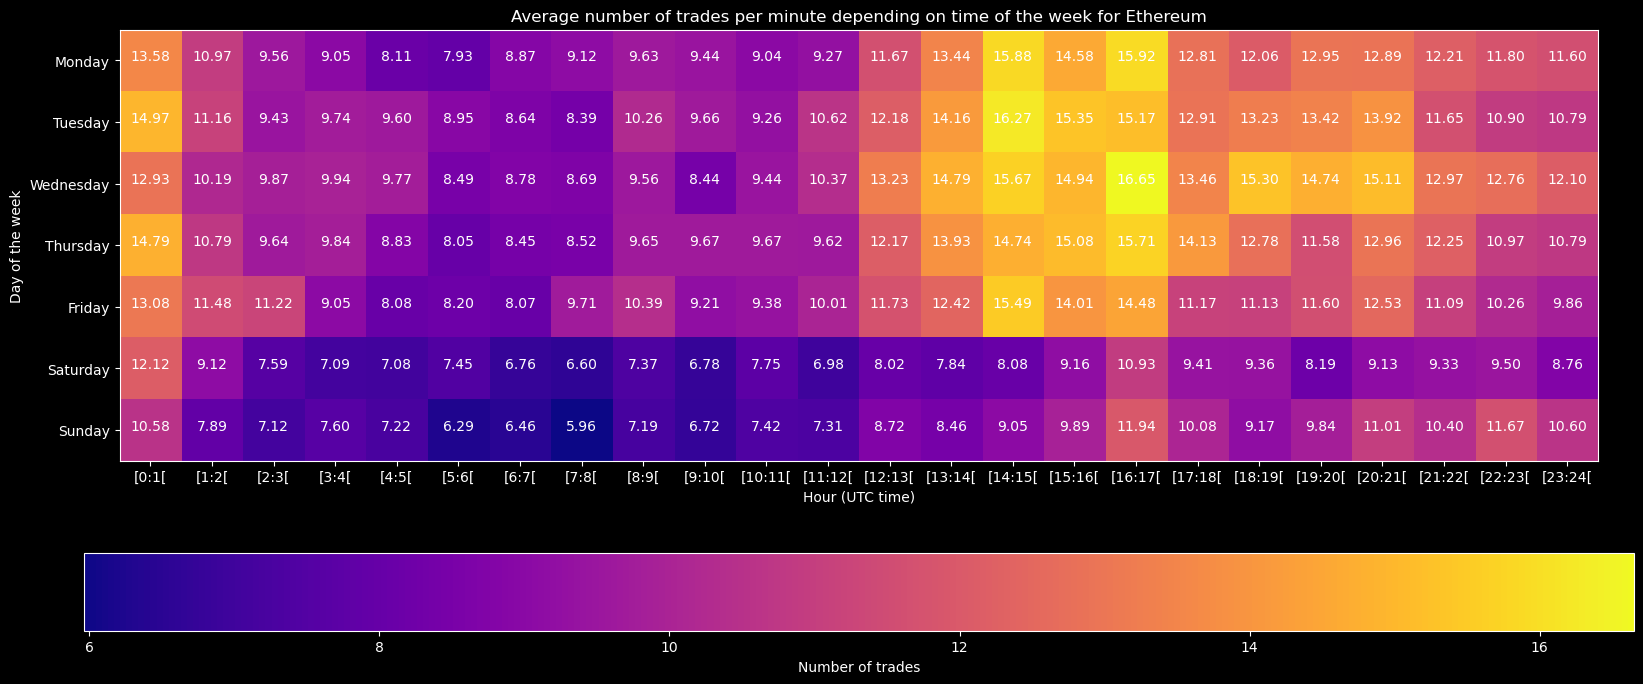

In [ ]:
fig, ax = plt.subplots()
im=ax.imshow(means,cmap="plasma")
hours=np.arange(0,24,1)
week=np.arange(0,7,1)
for i in week:
    for j in hours:
        ax.text(j,i,f"{means[i][j]:.2f}",horizontalalignment="center")
        
ax.set_xlabel("Hour (UTC time)")
ax.set_ylabel("Day of the week")
ax.set_title("Average number of trades per minute depending on time of the week for Ethereum")
cbar = ax.figure.colorbar(im, ax=ax,location="bottom",label="Number of trades")
x_ticks=np.arange(0,24,1)
y_ticks=np.arange(0,7,1)
ax.set_xticks(ticks=x_ticks,labels=[f"[{i}:{i+1}[" for i in x_ticks])
ax.set_yticks(ticks=y_ticks,labels=[i for i in calendar.day_name])
fig.set_figheight(8)
fig.set_figwidth(20)

plt.show()

In [ ]:
sum(sum(means))/168

15.056273174529203

In [ ]:
time=df["Time"][3000453]
date=datetime.datetime.utcfromtimestamp(time)
weekday=datetime.datetime.utcfromtimestamp(time).weekday()
print(date,weekday)

2023-09-30 23:58:00 5


In [8]:
df["Change"] = df["Close"] / df["Open"]
df["Var"]=df["High"]-df["Low"]

In [9]:
fees = 0.0052 #fees sur kraken.com 0.26% buy + 0.26% sell
buy = 1
sell = -1
decisionsArray = np.zeros(len(df.index))
for candle in df.index:
    if df["Change"][candle] > 1 + fees:
        decisionsArray[candle] = buy
    elif df["Change"][candle] < 1:
        decisionsArray[candle] = sell
df["Decisions"] = decisionsArray
#buy si 1+fee de rendement ou plus, sell si rendement < 1.

In [ ]:
df

,Time,Open,High,Low,Close,Volume,Trades,Change,Var,Decisions
0,1438956180,3.00000,3.00000,3.00,3.00,81.857278,2,1.000000,0.00000,0.0
1,1438967940,3.00001,3.00001,3.00,3.00,42.073291,2,0.999997,0.00001,-1.0
2,1439016180,3.00000,3.00000,3.00,3.00,0.400000,1,1.000000,0.00000,0.0
3,1439026260,2.00000,2.00000,2.00,2.00,125.000000,2,1.000000,0.00000,0.0
4,1439051400,1.20000,1.20000,1.20,1.20,54.759700,1,1.000000,0.00000,0.0
...,...,...,...,...,...,...,...,...,...,...
3000449,1696117980,1670.73000,1670.73000,1670.73,1670.73,0.209407,5,1.000000,0.00000,0.0
3000450,1696118040,1670.73000,1670.73000,1670.73,1670.73,5.331141,4,1.000000,0.00000,0.0
3000451,1696118100,1671.60000,1671.60000,1671.60,1671.60,0.394274,1,1.000000,0.00000,0.0
3000452,1696118220,1671.58000,1671.58000,1671.58,1671.58,0.014400,2,1.000000,0.00000,0.0


In [13]:
nBuys = 0
nSells = 0
for decision in decisionsArray:
    if decision == buy:
        nBuys += 1
    elif decision == sell:
        nSells += 1
print(f"nBuys: {nBuys}\nnSells: {nSells}")
#bcp trop de sells par rapport à buy

nBuys: 27196
nSells: 1104167


1104167
